In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

import torchvision.transforms as transforms
import torchvision
from torchvision.datasets import ImageFolder

import timm

import matplotlib.pyplot as plt #for data visualization
import pandas as pd
import numpy as np
import sys

from tqdm.notebook import tqdm

print("System Version: ", sys.version)
print("PyTorch Version: ", torch.__version__)
print("Torchvision version: ", torchvision.__version__)
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)



System Version:  3.13.9 (tags/v3.13.9:8183fa5, Oct 14 2025, 14:09:13) [MSC v.1944 64 bit (AMD64)]
PyTorch Version:  2.9.0+cpu
Torchvision version:  0.24.0+cpu
Numpy Version:  2.2.6
Pandas Version:  2.3.3


In [6]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform = None):
        #image folder assumes that any subfolders in the training will be the class name for the image and will handle creating all the labels
        self.data = ImageFolder(data_dir, transform = transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]
    
    @property
    def classes(self):
        return self.data.classes

In [8]:
dataset = PlayingCardDataset(data_dir="card_dataset/train")

In [9]:
len(dataset)

7624

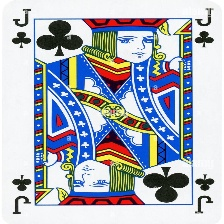

In [12]:
image, label = dataset[2345]
image

In [ ]:
data_dir = 'card_dataset/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)
#shows us what number in pytorch lines up with which label

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [15]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
#resizes all images to keep the size consistent since the model will expect every input to be similar

data_dir = 'card_dataset/train'
dataset = PlayingCardDataset(data_dir, transform)

In [16]:
image, label = dataset[100]
image.shape

torch.Size([3, 128, 128])

In [17]:
#batch size tells us how many examples we should pull each time we iterate over the dataloader
#shuffle tells the program to pull randomly or pull in order - shuffle is common when training the dataset but not so much when running a validation set
dataloader = DataLoader(dataset, batch_size = 32, shuffle = True)


In [18]:
for images, labels in dataloader:
    break

In [21]:
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [22]:
labels

tensor([25, 23, 32, 15,  8,  5,  0, 36, 51, 37, 31, 38, 14, 33, 25,  7, 33, 12,
         9, 18, 18, 23,  7, 26, 25, 16, 16, 15, 41,  9, 29, 12])